<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron 구현코드

In [0]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2,3]] #길이와 넓이 features할당
y = iris.target

In [0]:
# X와 y를 랜덤하게 나눔 30%는 test 70%는 train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state = 1, stratify = y) # stratify는 계층화를 의미


In [0]:
#계층화 확인
print(np.bincount(y))
print(np.bincount(y_train))
print(np.bincount(y_test))

[50 50 50]
[35 35 35]
[15 15 15]


In [0]:
# 스케일 조정 (standardization)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [0]:
# scikit learn의 perceptron 사용
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter = 40, eta0 = 0.1, tol = 1e-3, random_state = 1)
ppn.fit(X_train_std, y_train)



Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
# 잘못분류된 개수
y_pred = ppn.predict(X_test_std)
print((y_test != y_pred).sum())

1


In [0]:
# 정확도 계산
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx = None, resolution = 0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  #경계 그리기
  x1_min, x1_max = X[:,0].min() -1, X[:,0].max() +1
  x2_min, x2_max = X[:,1].min() -1, X[:,1].max() +1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  
  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1,xx2,Z,alpha = 0.3, cmap = cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor = 'black')
    if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]

      plt.scatter(X_test[:,0], X_test[:,1], c = '', edgecolor = 'black', alpha = 1.0, linewidth = 1, marker = 'o',
                  s = 100, label = 'test set')

제대로된 분류가 이루어지지 않음을 확인할 수 있음

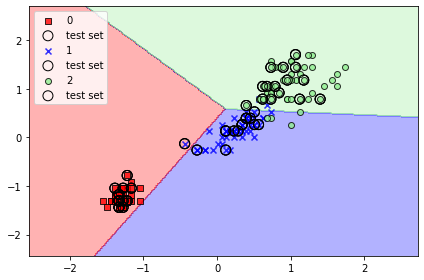

In [0]:
# 적용
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X = X_combined_std, y = y_combined, classifier = ppn, test_idx = range(105, 150))
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

## 로지스틱 회귀

In [0]:
class LogisticRegressionGD(object):
  def __init__ (self, eta = 0.05, n_iter = 100, random_state = 1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    
    self.cost_ = []

    for i in range(self.n_iter):
      net_input = self.net_input(X)
      output = self.activation(net_input)
      errors = y - output

      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()

      cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
      self.cost_.append(cost)
    
    return self

  def net_input(self,X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def activation(self, z):
    return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

  def predict(self,X):
    return(np.where(self.net_input(X) >= 0.0, 1, 0))

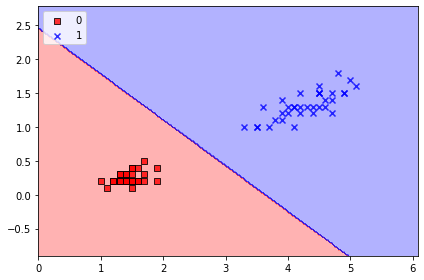

In [0]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta = 0.05, n_iter = 1000, random_state = 1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X = X_train_01_subset, y = y_train_01_subset, classifier = lrgd)
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

# 사이킷런을 이용한 로지스틱회귀


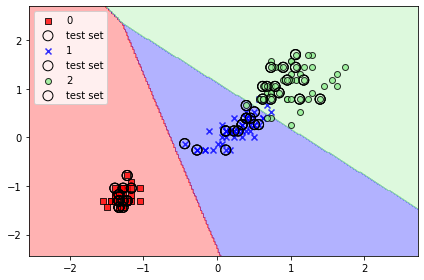

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto', C = 100.0, random_state = 1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier = lr, test_idx = range(105, 150))
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()